In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torchvision.transforms import Normalize, Resize, ToTensor
from torch.utils.tensorboard import SummaryWriter



In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
import os
import time
import datetime


***MODEL Prepare***

In [3]:
#checkpoint = 'ckpt-199.pth.tar'
checkpoint = 'checkpoint/ckpt-2999.pth.tar'


In [4]:
model = models.resnet50(pretrained=False)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 2),
                                 nn.LogSoftmax(dim=1))




In [5]:
checkpoint  = torch.load(checkpoint)

In [6]:
state_dict = checkpoint['state_dict']

In [7]:
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v

In [8]:
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [9]:
from imutils import paths
import os
import cv2 

data_dir = 'images'

imagePaths = list(paths.list_images(data_dir))
labels = []
for path in imagePaths:
    label = path.split(os.path.sep)[-2]
    labels.append(label)



In [10]:
# for image,label in zip(imagePaths,labels ):
#     print(image," --> ", label)

In [13]:
class XrayDataset(Dataset):
    
    def __init__(self, paths, labels, transform=None):
        
        
        self.paths = paths
        self.labels = labels
        self.transform = transform
        
    
    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        
        filepath = self.paths[idx]
        #print(filepath)
        image =  Image.open(filepath)

        #image = cv2.resize(image, (224, 224))

        if self.transform:
            image = self.transform(image)
            #print(image.shape)
        class_id = -1
        if self.labels[idx] == 'covid19':
            class_id = 0
        else:
            class_id = 1
        return image, class_id

In [23]:
transform = transforms.Compose([transforms.Grayscale(3),
                                      transforms.Resize((224,224)),
                                      transforms.ToTensor()
                                     
                                      ])

normalize =  transforms.Normalize(mean=[0.5], std=[0.5])
   

combined = transforms.Compose([transform, normalize])


In [12]:
dataset = XrayDataset( imagePaths, labels, combined )
batch_size=4
dataloader = DataLoader(dataset, batch_size=batch_size,  shuffle=True, num_workers=0)


NameError: name 'XrayDataset' is not defined

In [14]:
 #next(iter(dataloader))

In [15]:
model.eval()
#model.cuda()

correct = 0
total = 0
running_loss = 0.0
with torch.no_grad():
    for i, (input, target) in enumerate(dataloader):
       # target = target.cuda()
        #input = input.cuda()
        # compute output
        output = model(input)
        _, predicted = torch.max(output.data, 1)
        #print(predicted, "  ==  ", target)
        total += target.size(0)
        batch_correct = (predicted == target).sum().item()
        if batch_correct != 4:
             print(predicted, "  ==  ", target, batch_correct)
        correct += batch_correct

        #running_loss += loss.item()

        # measure accuracy and record loss
        #prec1, prec5 = accuracy(output.data, target, topk=(1, 5))
accurecy = 100 * correct / total
print(correct)
print(total)


RuntimeError: Given groups=1, weight of size 64 1 7 7, expected input[4, 3, 224, 224] to have 1 channels, but got 3 channels instead

In [39]:
image1 = 'images/covid19/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg'
image2 = 'images/covid19/nejmc2001573_f1b.jpeg'
image3 = 'images/covid19/covid-19-infection-exclusive-gastrointestinal-symptoms-l.png'

In [40]:
img1 = 'images/normal/IM-0318-0001.jpeg'
img2 = 'images/normal/NORMAL2-IM-0468-0001.jpeg'
img3 = 'images/normal/NORMAL2-IM-1343-0001.jpeg'

In [41]:
image1 =  Image.open(image1)
image2 =  Image.open(image2)
image3 =  Image.open(image3)



In [42]:
img1 = Image.open(img1)
img2 = Image.open(img2)
img3 = Image.open(img3)

In [43]:
image1 = transform(image1)
image2 = transform(image2)
image3 = transform(image3)

nor_image1 = normalize(image1)
nor_image2 = normalize(image2)
nor_image3 = normalize(image3)


In [44]:
nor_image1.shape

torch.Size([3, 224, 224])

In [29]:
img1 = transform(img1)
img2 = transform(img2)
img3 = transform(img3)

img1 = nomalize(img1)
img2 = nomalize(img2)
img3 = nomalize(img3)


NameError: name 'nomalize' is not defined

In [ ]:
image = image1

In [ ]:
image.unsqueeze_(0)

In [ ]:
image.shape

In [ ]:
output = model(image)

In [ ]:
output

In [ ]:
_, predicted = torch.max(output.data, 1)
prediction_score, pred_label_idx = torch.topk(output, 1)


In [ ]:
predicted

In [ ]:
output

In [ ]:
prediction_score

In [ ]:
pred_label_idx

In [14]:
file_path = '/home/ramkik/covid19/static/uploads/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg'

In [ ]:
image = Image.open(file_path)
image = transform(image)
print(image.shape)
normalize_image = normalize(image)
normalize_image = normalize_image.unsqueeze(0)
output = model(normalize_image)
prediction_score, pred_label_idx = torch.topk(output, 1)
pred_label_idx.squeeze_()

torch.Size([3, 224, 224])


In [ ]:
output

In [ ]:
prediction_score

In [ ]:
from captum.attr import IntegratedGradients
from captum.attr import GradientShap
from captum.attr import Occlusion
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz
from matplotlib.colors import LinearSegmentedColormap

from captum.attr import GuidedGradCam

In [ ]:
integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(image1, target=pred_label_idx, n_steps=200)

In [ ]:
attributions_ig.shape

In [ ]:
default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                  (0.25, '#0000ff'),
                                                  (1, '#0000ff')], N=256)

In [ ]:
fig, axis= viz.visualize_image_attr(np.transpose(attributions_ig.view(1,224,224).cpu().detach().numpy(), (1,2,0)),
                             np.transpose(image.view(1,224,224).cpu().detach().numpy(), (1,2,0)),
                             method='blended_heat_map',
                             cmap=default_cmap,
                             show_colorbar=True,
                             sign='positive',
                             outlier_perc=1)

In [ ]:
predict = model(image)
prediction_score, pred_label_idx = torch.topk(output, 1)

last_conv = model.layer4

In [ ]:


grads =K.gradients(model.output[:,target_class],last_conv.output)[0]
pooled_grads = K.mean(grads,axis=(0,1,2))
iterate = K.function([model.input],[pooled_grads,last_conv.output[0]])
pooled_grads_value,conv_layer_output = iterate([img])

for i in range(512):
    conv_layer_output[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output,axis=-1)

for x in range(heatmap.shape[0]):
    for y in range(heatmap.shape[1]):
        heatmap[x,y] = np.max(heatmap[x,y],0)
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.imshow(heatmap)
img_gray = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
upsample = cv2.resize(heatmap, (224,224))

output_path_gradcam = '/kaggle/working/' + files[ind] + 'gradcam.jpeg'
plt.imsave(output_path_gradcam,upsample * img_gray)

In [ ]:
cam = GuidedGradCam(model, model.layer4)

In [ ]:
attributions_ig = cam.attribute(normalize_image, target=1)

In [ ]:
fig, axis= viz.visualize_image_attr(np.transpose(attributions_ig.view(1,224,224).cpu().detach().numpy(), (1,2,0)),
                             np.transpose(normalize_image.view(1,224,224).cpu().detach().numpy(), (1,2,0)),
                             method='heat_map',
                             #cmap=default_cmap,
                             show_colorbar=True,
                             sign='positive',
                             outlier_perc=1)

In [45]:
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp
from torchvision.utils import make_grid, save_image


gradcam = GradCAM(model, model.layer4)


In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

resnet = models.resnet50(pretrained=True)
#resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)



In [47]:

configs = [
    dict(model_type='resnet', arch=resnet, layer_name='layer4'),
]

In [48]:
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [49]:
cams

[[<gradcam.gradcam.GradCAM at 0x7ff8b01e2f10>,

In [50]:
nor_image1.unsqueeze_(0)
nor_image1.shape

torch.Size([1, 3, 224, 224])

In [51]:
images = []
for gradcam, gradcam_pp in cams:
    mask, _ = gradcam(nor_image1.cuda())
    heatmap, result = visualize_cam(mask, image1)

    mask_pp, _ = gradcam_pp(nor_image1.cuda())
    heatmap_pp, result_pp = visualize_cam(mask_pp, image1)
    
    images.extend([image1.cpu(), heatmap, heatmap_pp, result, result_pp])
  
for i in images:
    print(i.shape)
grid_image = make_grid(images, nrow=5)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


/home/ramkik/anaconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [52]:
plt.show(np.transpose(grid_imagem (1,2,0)))

NameError: name 'plt' is not defined

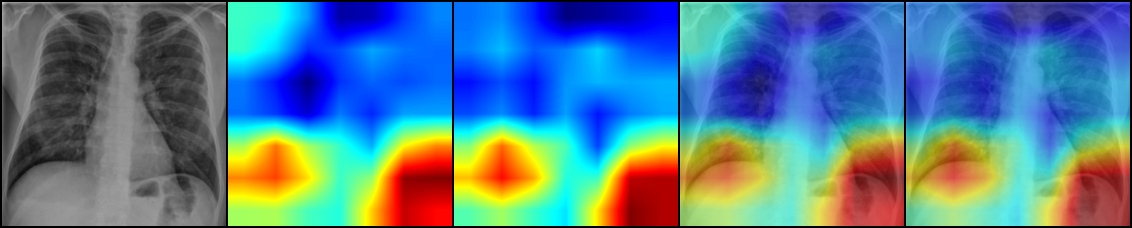

In [53]:
transforms.ToPILImage()(grid_image)
